In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
from matplotlib.mlab import bivariate_normal

import numpy as np
import sympy as sp
import scipy.special as spec

r = sp.symbols('r')
t = sp.S('t')

sp.init_printing()

In [2]:
c = 3e8
omega = sp.S('omega')
k = omega/c

puls = [n*np.pi*1e7 for n in range(8,11)] + [n*np.pi*1e6 for n in range(8,11)]

B_field_omega = sp.besselj(0,k*r) - sp.bessely(0,k*r)
B_field = sum([B_field_omega.subs(omega, om) for om in puls])
B_function = sp.lambdify((r, omega), B_field, modules=['numpy',{"besselj":spec.jn, "bessely":spec.yn}])

B_field

In [25]:
def graphe_B():
    omega = 1e8
    
    rmax = 100
    radii = np.linspace(0.1,rmax,10*rmax)
    
    champ = B_function(radii,omega)
    
    fig, ax = plt.subplots(1,1)
    
    ax.grid()
    ax.plot(radii, champ)
    
    ax.set_title(r'Champ magnétique créé par un courant variable')
    
    fig.tight_layout()
    
    return fig

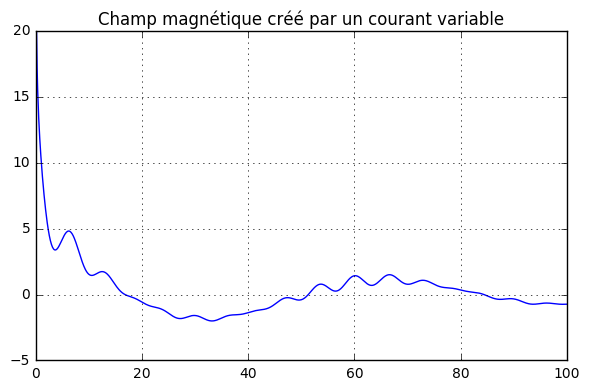

In [26]:
graphe_Btheta = graphe_B()
graphe_Btheta.savefig('profil_champ.png')

In [27]:
def build_field():    
    rmax = 10
    wind = 60
    
    omega = 1e8
    
    Y, X = np.ogrid[-wind:wind:wind*10j, -wind:wind:wind*10j]
    
    def field_func(x,y):
        r = np.sqrt(x*x+y*y)
        Btheta = B_function(r, omega)
        direct = np.array([-y/r, x/r])
        return Btheta*direct
    
    field_X, field_Y = field_func(X, Y)
    
    
    color = np.exp(-np.sqrt(field_X**2 + field_Y**2))
    
    fig, ax = plt.subplots(1, 1, figsize=(8,8))
    ax.grid()
    ax.set_aspect('equal')
    
    ax.set_xlim((-wind,wind))
    ax.set_ylim((-wind,wind))
    
    Z = np.exp(-2*np.sqrt(field_X**2+field_Y**2))
    Z = np.nan_to_num(Z)
    
    strm = ax.streamplot(X,Y, field_X, field_Y, 
        arrowstyle='->', 
        arrowsize=2, 
        color=Z,
        cmap=plt.cm.inferno,density=2 
        )
    
    #fig.colorbar(strm.lines)
    
    fig.tight_layout()
    
    return fig
    

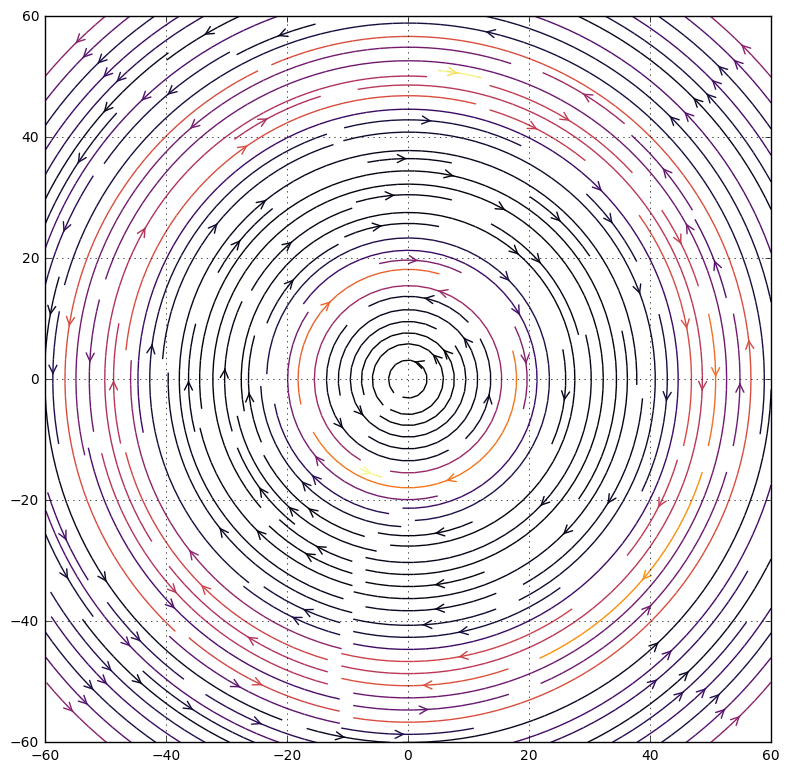

In [28]:
output_field = build_field()
output_field.savefig("champmag_courant_variable.png")